In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# EDA

In [4]:
df.shape

(51717, 17)

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

here we can see that approx_cost(for two people) is a object so we have to convert it to int or float
and rate is also object before converting to float we have to clean by checking unique values and removing them


<AxesSubplot:>

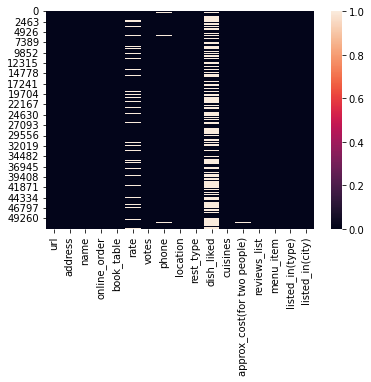

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

<AxesSubplot:>

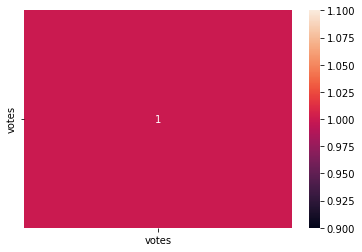

In [9]:
sns.heatmap(df.corr(), annot=True)

Text(0.5, 0, 'Counts')

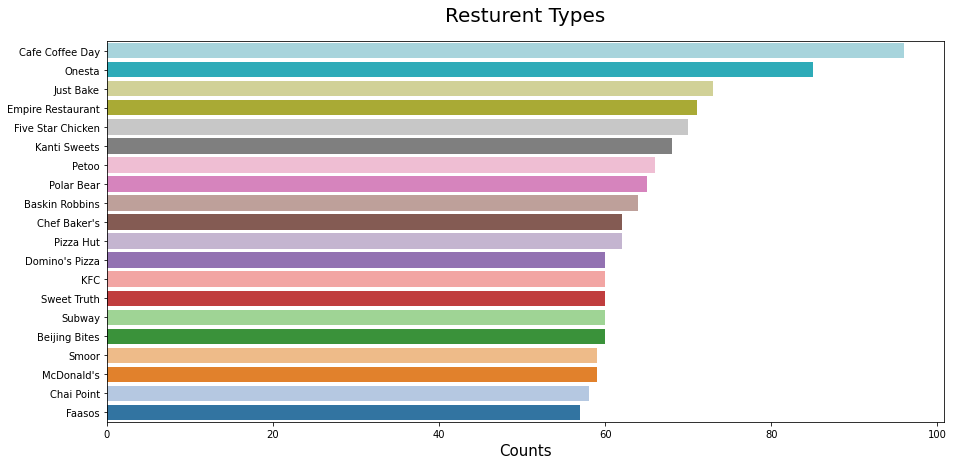

In [10]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]#change this value to see more result
sns.barplot(x=chains,y=chains.index,palette='tab20_r')
plt.title("Resturent Types",size=20,pad=20)
plt.xlabel("Counts",size=15)

<AxesSubplot:xlabel='book_table', ylabel='count'>

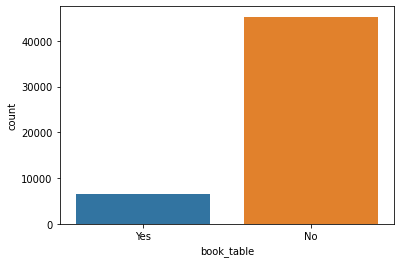

In [11]:

sns.countplot(x='book_table', data=df)

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

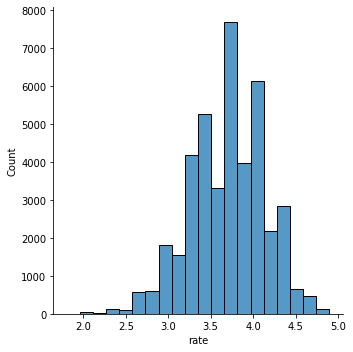

In [14]:
sns.displot(df['rate'],bins=20)
# fig=plt.gcf()
# fig.set_size_inches(10,6)

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

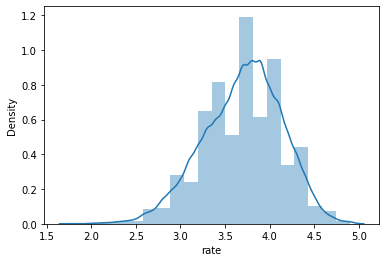

In [15]:
sns.distplot(df['rate'],bins=20)

In [16]:
df['location'].unique(), len(df['location'].unique())

(array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
        'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
        'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
        'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
        'Bommanahalli', nan, 'Electronic City', 'HSR', 'Marathahalli',
        'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
        'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
        'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
        'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
        'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
        'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
        'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
        'St. Marks Road', 'Cunningham Road', 'Race Course Road',
        'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
        'Ejipura', 'Jeevan Bhi

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location')

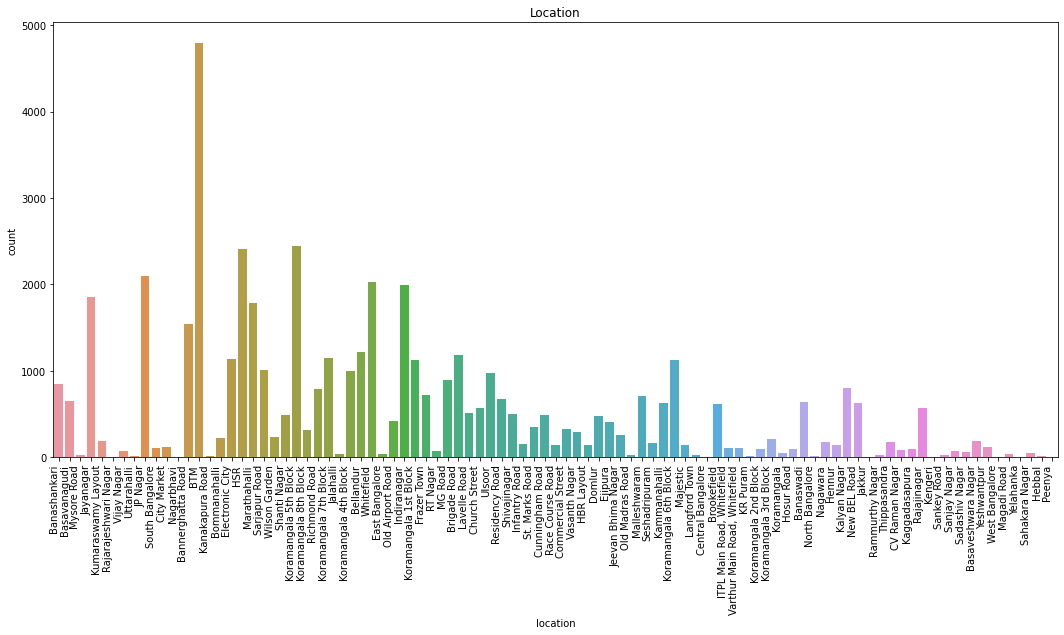

In [17]:
sns.countplot(df['location'])
sns.countplot(df['location']).set_xticklabels(sns.countplot(df['location']).get_xticklabels(),rotation=90, ha='right')
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Location')


In [18]:
df['rest_type'].unique(),print('unique numbers of rest_typt',len(df['rest_type'].unique()) )

unique numbers of rest_typt 94


(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Beverage Shop, Quick Bites', 'Confectionery',
        'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
        'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
        'Food Truck', 'Quick Bites, Dessert Parlor',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
        'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
        'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dini

Text(0.5, 0, 'Counts')

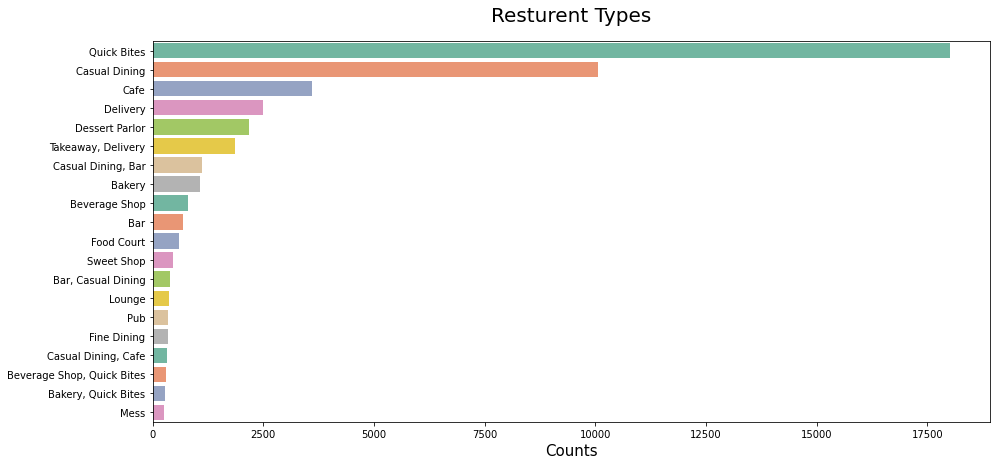

In [19]:
plt.figure(figsize=(15,7))
chains=df['rest_type'].value_counts()[:20]#change this value to see more result
sns.barplot(x=chains,y=chains.index,palette='Set2')
plt.title("Resturent Types",size=20,pad=20)
plt.xlabel("Counts",size=15)

In [20]:
df['dish_liked'].unique(), len(df['dish_liked'].unique())

(array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
        'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
        'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
        ...,
        'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
        'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
        'Biryani, Andhra Meal'], dtype=object),
 5229)

In 'dish_liked' there are 5229 unique values 

Text(0.5, 0, 'Counts')

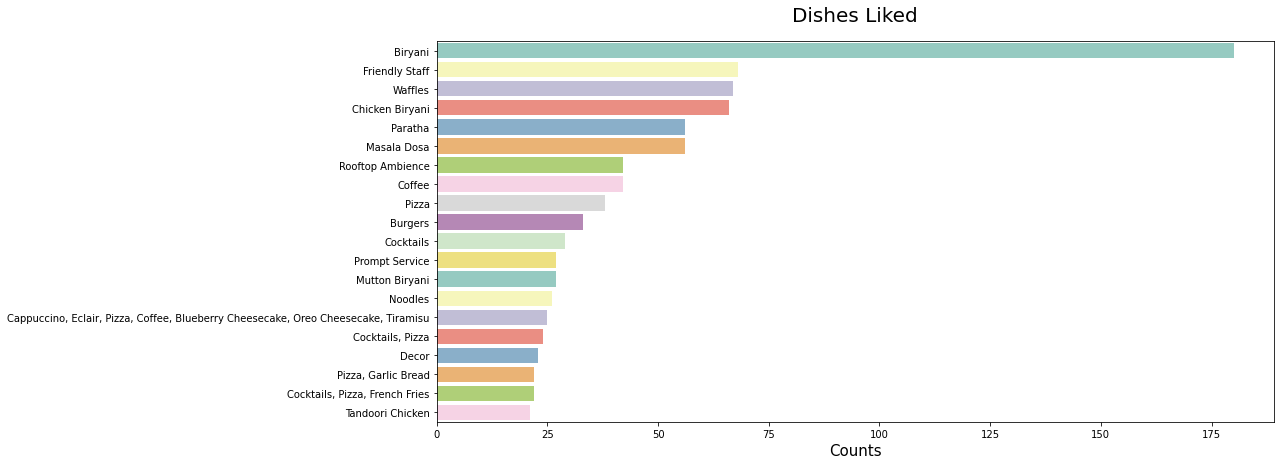

In [21]:
plt.figure(figsize=(15,7))
chains=df['dish_liked'].value_counts()[:20]#change this value to see more result
sns.barplot(x=chains,y=chains.index,palette='Set3')
# sns.countplot(df['dish_liked']).set_xticklabels(sns.countplot(df['dish_liked']).get_xticklabels(),rotation=90, ha='right')
plt.title("Dishes Liked",size=20,pad=20)
plt.xlabel("Counts",size=15)


In [22]:
df['cuisines'].unique(), len(df['cuisines'].unique())

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ...,
        'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 2633)

Text(0.5, 0, 'Counts')

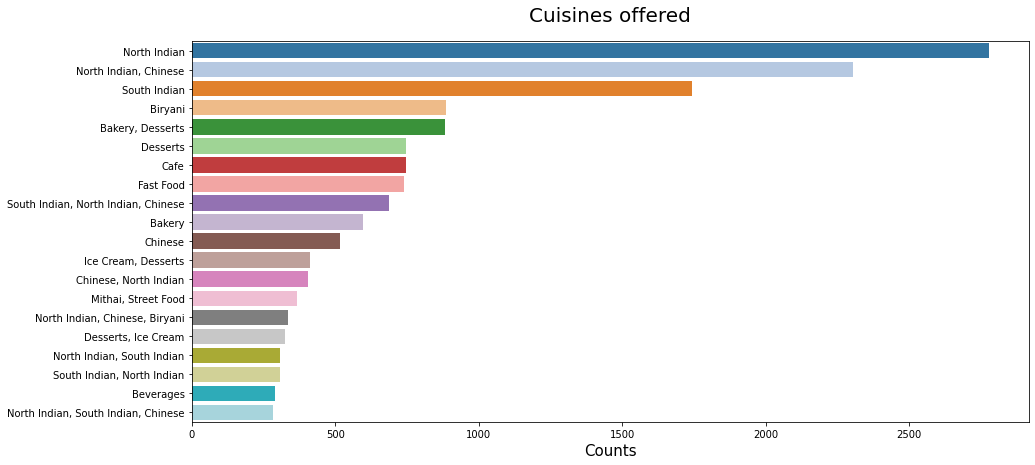

In [23]:
plt.figure(figsize=(15,7))
chains=df['cuisines'].value_counts()[:20]#change this value to see more result
sns.barplot(x=chains,y=chains.index,palette='tab20')
# sns.countplot(df['dish_liked']).set_xticklabels(sns.countplot(df['dish_liked']).get_xticklabels(),rotation=90, ha='right')
plt.title("Cuisines offered",size=20,pad=20)
plt.xlabel("Counts",size=15)

In [24]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [25]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          49440 non-null  object 
 1   address                      49440 non-null  object 
 2   name                         49440 non-null  object 
 3   online_order                 49440 non-null  object 
 4   book_table                   49440 non-null  object 
 5   rate                         41665 non-null  float64
 6   votes                        49440 non-null  int64  
 7   phone                        48250 non-null  object 
 8   location                     49419 non-null  object 
 9   rest_type                    49215 non-null  object 
 10  dish_liked                   23492 non-null  object 
 11  cuisines                     49395 non-null  object 
 12  approx_cost(for two people)  49099 non-null  float64
 13  reviews_list    

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Count'>

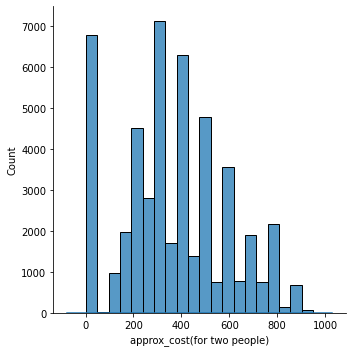

In [26]:
sns.displot(df['approx_cost(for two people)'], bins=20)



sns.distplot(df['approx_cost(for two people)'])


C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

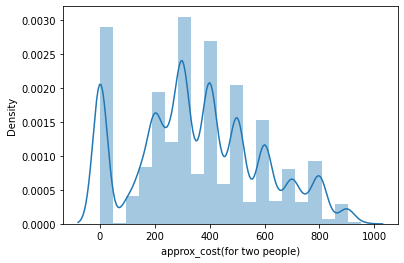

In [27]:
sns.distplot(df['approx_cost(for two people)'], bins=20)

In [28]:
df['reviews_list'].unique(), len(df['reviews_list'].unique())

(array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said t

In [29]:
df['menu_item'].unique(),len(df['menu_item'].unique())

(array(['[]',
        "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Che

In [30]:
df['listed_in(type)'].unique(),len(df['listed_in(type)'].unique())

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 7)

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='listed_in(type)', ylabel='count'>

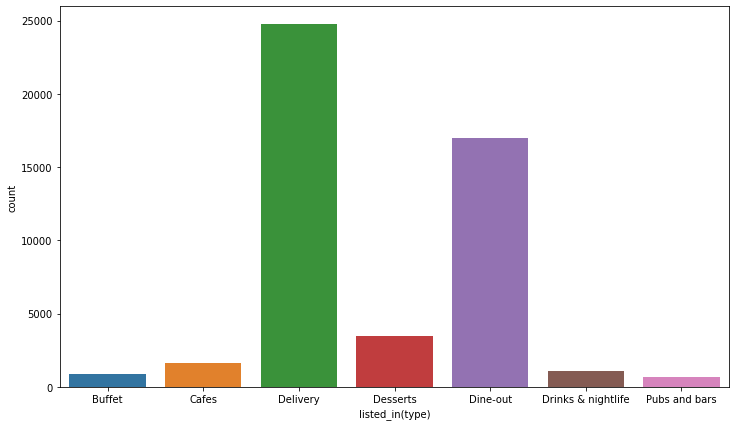

In [31]:
plt.figure(figsize=(12,7))
sns.countplot(df['listed_in(type)'])

In [32]:
df['listed_in(city)'].unique(),len(df['listed_in(city)'].unique())

(array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
        'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
        'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
        'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
        'Koramangala 4th Block', 'Koramangala 5th Block',
        'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
        'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
        'Old Airport Road', 'Rajajinagar', 'Residency Road',
        'Sarjapur Road', 'Whitefield'], dtype=object),
 30)

Text(0.5, 0, 'Counts')

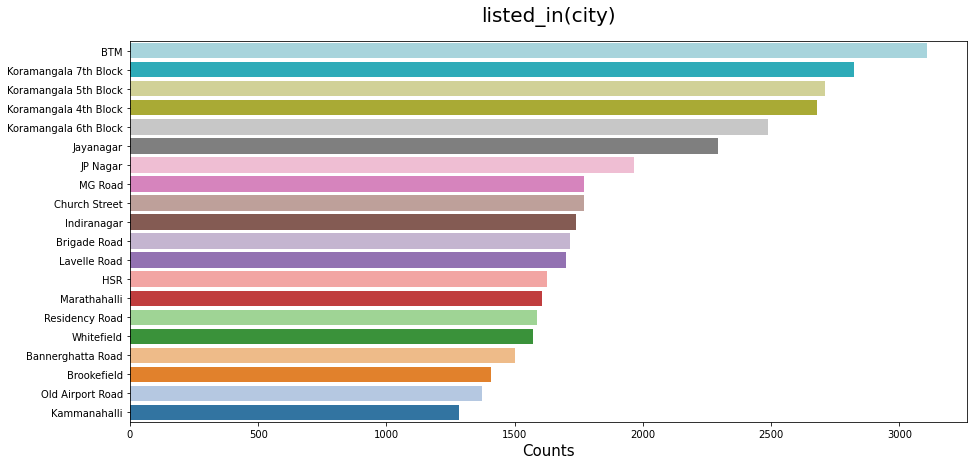

In [33]:
# sns.countplot(df['listed_in(city)'])

plt.figure(figsize=(15,7))
chains=df['listed_in(city)'].value_counts()[:20]#change this value to see more result
sns.barplot(x=chains,y=chains.index,palette='tab20_r')
plt.title('listed_in(city)',size=20,pad=20)
plt.xlabel("Counts",size=15)

<AxesSubplot:xlabel='rate', ylabel='votes'>

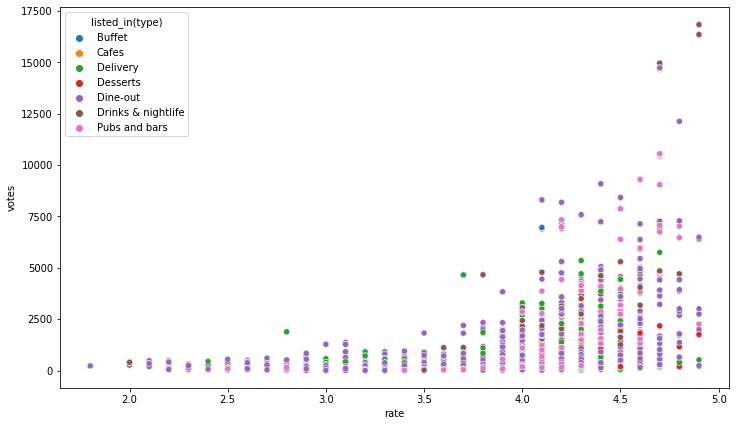

In [34]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='rate', y='votes', data=df, hue='listed_in(type)')

<AxesSubplot:xlabel='online_order', ylabel='votes'>

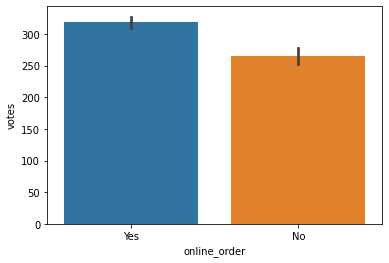

In [35]:
sns.barplot(x='online_order', y='votes', data=df)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

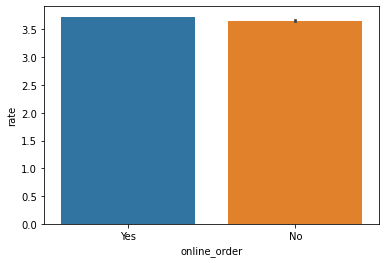

In [36]:
sns.barplot(x='online_order', y='rate', data=df)

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='votes'>

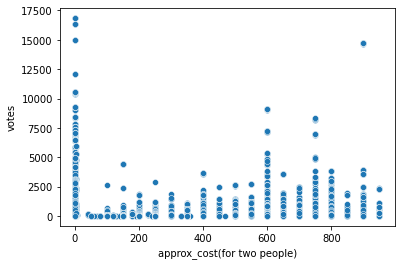

In [37]:
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df)

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='rate'>

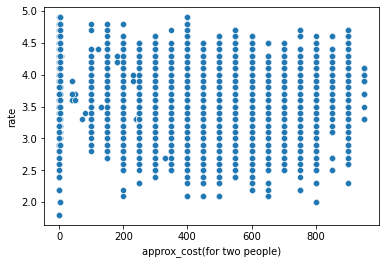

In [38]:
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)

<AxesSubplot:xlabel='listed_in(type)', ylabel='votes'>

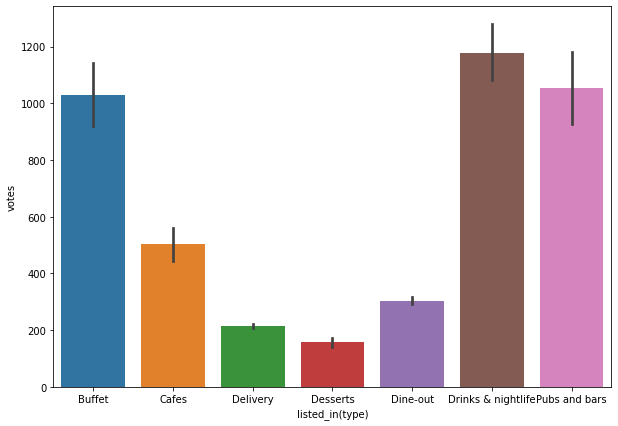

In [39]:
plt.figure(figsize=(10,7))
sns.barplot(y='votes', x='listed_in(type)', data=df)


<AxesSubplot:xlabel='listed_in(type)', ylabel='rate'>

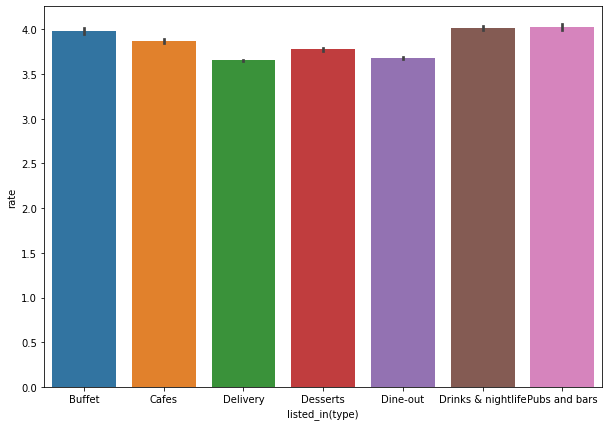

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(y='rate', x='listed_in(type)', data=df)

<AxesSubplot:xlabel='rate', ylabel='listed_in(city)'>

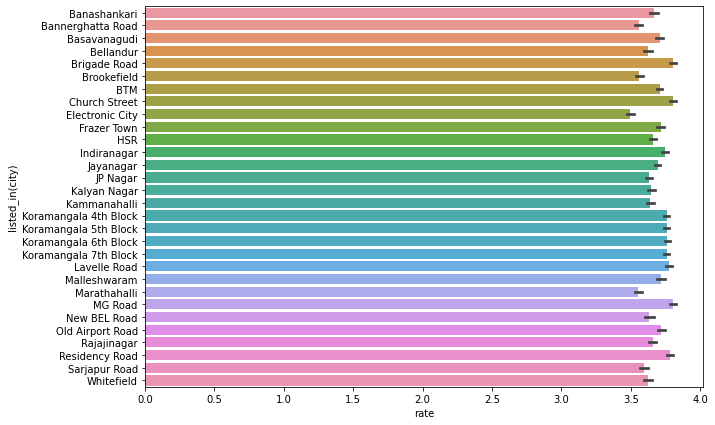

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(x='rate', y='listed_in(city)', data=df)


<AxesSubplot:xlabel='votes', ylabel='listed_in(city)'>

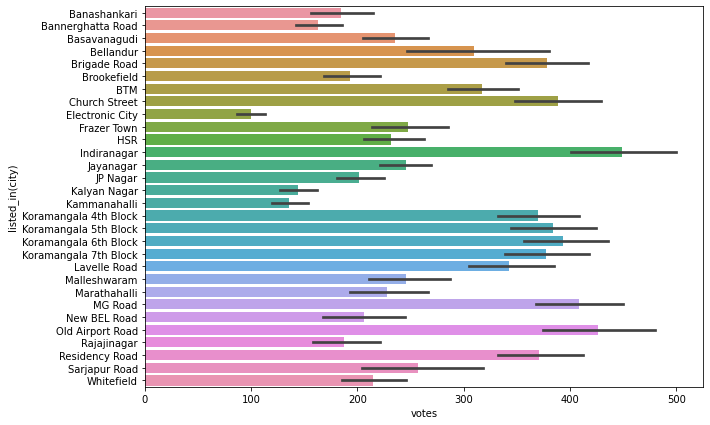

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(x='votes', y='listed_in(city)', data=df)

In [43]:

df['listed_in(type)'].unique(),len(df['listed_in(type)'].unique())

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 7)

# Data preprocessing

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0
df.online_order = pd.to_numeric(df.online_order)
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0
df.book_table = pd.to_numeric(df.book_table)

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cw

In [46]:
df['listed_in(type)'].unique(),len(df['listed_in(type)'].unique())

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 7)

In [47]:
typ_dict={'Buffet':1, 'Cafes':2, 'Delivery':3, 'Desserts':4, 'Dine-out':5,'Drinks & nightlife':6, 'Pubs and bars':7}
df['listed_in(type)']=df['listed_in(type)'].map(typ_dict)

In [48]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.dish_liked = le.fit_transform(df.dish_liked)
# df['listed_in(type)'] = le.fit_transform(df['listed_in(type)'])
df['listed_in(city)'] = le.fit_transform(df['listed_in(city)'])

In [49]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,1,27,3628,2091,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,080 41714161,1,27,2945,922,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,+91 9663487993,1,22,1405,743,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,1,78,2747,2469,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],1,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,+91 8026612447\r\n+91 9901210005,4,27,3431,2119,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],1,1


In [50]:
df_new = df.drop(['url','address','name','phone','reviews_list','menu_item'],axis=1)

In [51]:
df_new

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,1,27,3628,2091,800.0,1,1
1,1,0,4.1,787,1,27,2945,922,800.0,1,1
2,1,0,3.8,918,1,22,1405,743,800.0,1,1
3,0,0,3.7,88,1,78,2747,2469,300.0,1,1
4,0,0,3.8,166,4,27,3431,2119,600.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
49435,0,0,3.6,27,89,8,5228,977,1.5,7,29
49436,0,0,NaN,0,89,8,5228,1346,600.0,7,29
49437,0,0,NaN,0,89,8,5228,1346,2.0,7,29
49438,0,1,4.3,236,26,8,1560,1346,2.5,7,29


In [52]:
df_new.to_csv('Zomato_clean.csv')

In [53]:
df_new.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,1,27,3628,2091,800.0,1,1
1,1,0,4.1,787,1,27,2945,922,800.0,1,1
2,1,0,3.8,918,1,22,1405,743,800.0,1,1
3,0,0,3.7,88,1,78,2747,2469,300.0,1,1
4,0,0,3.8,166,4,27,3431,2119,600.0,1,1


In [54]:
df_new.isnull().sum()

online_order                      0
book_table                        0
rate                           7775
votes                             0
location                          0
rest_type                         0
dish_liked                        0
cuisines                          0
approx_cost(for two people)     341
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

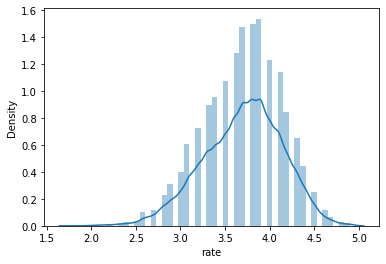

In [55]:
sns.distplot(df_new['rate'])

In [56]:
df_new['rate'].fillna(df['rate'].mean(), inplace = True)

C:\Users\HP\anaconda3\envs\zomato\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

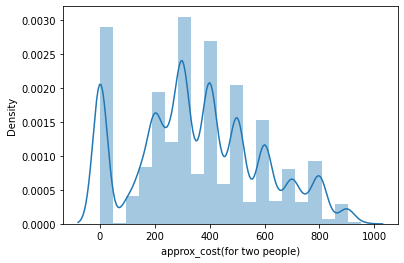

In [57]:
sns.distplot(df_new['approx_cost(for two people)'],bins=20)

In [58]:
df_new['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace = True)

# Modeling

In [59]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [60]:
x=df_new.drop('rate', axis=1)
y=df_new['rate']

In [61]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=.20)

In [62]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [63]:
pred_linear = reg.predict(x_test)

In [64]:
r2_score(y_test,pred_linear)

0.3087498770338898

In [65]:
random_reg=RandomForestRegressor(n_estimators=1000,random_state=500,min_samples_leaf=.0001)
random_reg.fit(x_train,y_train)
random_pred=random_reg.predict(x_test)
r2_score(y_test,random_pred)

0.873789598626657

In [66]:
import xgboost
from xgboost import XGBRegressor

In [67]:
xgb=XGBRegressor()

In [68]:
xgb_reg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_reg.fit(x_train, y_train)
xgb_pred=xgb_reg.predict(x_test)
r2_score(y_test,xgb_pred)

0.9120715036018783

In [69]:
import pickle 
pickle.dump(xgb_reg, open('zomato.pkl','wb'))
model=pickle.load(open('zomato.pkl','rb'))